Для начала просто считаем данные

In [ ]:
import pandas as pd

df = pd.read_csv("dow_jones_index.data")

df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


Обработаем полученные данные в нужный нам формат:

In [ ]:
new_df = df.dropna()
new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
new_df['low'] = new_df['low'].str.replace('$', '', regex=True).astype(float)
new_df['close'] = new_df['close'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_open'] = new_df['next_weeks_open'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_close'] = new_df['next_weeks_close'].str.replace('$', '', regex=True).astype(float)
new_df

<ipython-input-34-64062ec2792b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
<ipython-input-34-64062ec2792b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
<ipython-input-34-64062ec2792b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [ ]:
data_df = new_df[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
data_df

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,19,0.187852,-2.470660
2,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,12,0.189994,1.638310
3,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5,0.185989,5.933250
4,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,97,0.175029,0.230814
5,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,90,0.172712,-0.632547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,75,0.568801,-2.521610
746,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,68,0.578960,-1.420980
747,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,61,0.589120,-1.225000
748,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,54,0.594786,-2.377620


In [ ]:
y = data_df['percent_change_next_weeks_price']
X = data_df.drop('percent_change_next_weeks_price', axis=1)

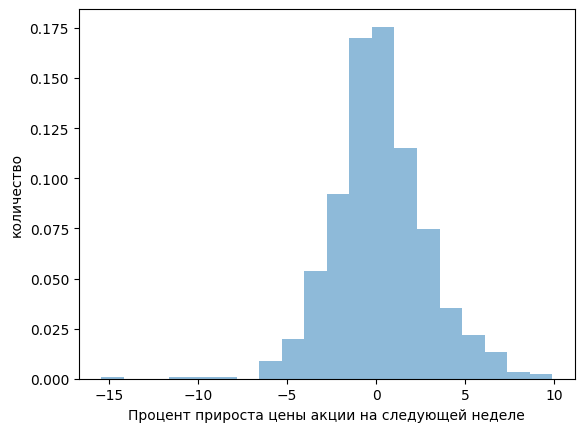

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y, 20, density=True, alpha = 0.5)
plt.xlabel('Процент прироста цены акции на следующей неделе')
plt.ylabel('количество')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split

train_size = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, input_shape=(12, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=50)

model.evaluate(X_test.to_numpy(), y_test.to_numpy())

Epoch 1/50
18/18 [==============================] - 4s 7ms/step - loss: 7.4636
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4127
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4415
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4275
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4079
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4022
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4107
Epoch 8/50
18/18 [==============================] - 0s 8ms/step - loss: 7.4001
Epoch 9/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3822
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3817
Epoch 11/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3632
Epoch 12/50
18/18 [==============================] - 0s 8ms/step - loss: 7.3516
Epoch 13/50
18/18 [==============================

6.17500114440918

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# YOUR SOLUTION HERE

mean_squared_error(y_test, y_pred)


1.9575959351541727

In [ ]:
mean_absolute_error(y_test, y_pred)

0.9214820026182428

In [ ]:
intel = new_df[new_df['stock'] == "INTC"]
intel

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
157,1,INTC,1/14/2011,20.71,21.33,20.57,21.08,274111012,1.786580,-29.118929,386719626.0,21.03,20.82,-0.998573,20,0.853890
158,1,INTC,1/21/2011,21.03,21.20,20.62,20.82,218479469,-0.998573,-20.295260,274111012.0,21.03,21.46,2.044700,13,0.864553
159,1,INTC,1/28/2011,21.03,21.94,20.93,21.46,325168191,2.044700,48.832379,218479469.0,21.55,21.68,0.603248,6,0.838770
160,1,INTC,2/4/2011,21.55,21.71,21.03,21.68,277969054,0.603248,-14.515300,325168191.0,21.74,21.76,0.091996,89,0.830258
161,1,INTC,2/11/2011,21.74,21.86,21.35,21.76,236842359,0.091996,-14.795422,277969054.0,21.63,22.14,2.357840,82,0.827206
162,1,INTC,2/18/2011,21.63,22.14,21.28,22.14,201181541,2.357840,-15.056774,236842359.0,21.95,21.86,-0.410023,75,0.813008
163,1,INTC,2/25/2011,21.95,22.19,21.01,21.86,256135777,-0.410023,27.315745,201181541.0,21.75,21.56,-0.873563,68,0.823422
164,1,INTC,3/4/2011,21.75,22.08,21.35,21.56,291751623,-0.873563,13.905065,256135777.0,21.69,20.87,-3.780540,61,0.834879
165,1,INTC,3/11/2011,21.69,21.74,20.61,20.87,289874871,-3.780540,-0.643270,291751623.0,20.66,19.93,-3.533400,54,0.862482
166,1,INTC,3/18/2011,20.66,20.88,19.71,19.93,347426088,-3.533400,19.853814,289874871.0,19.90,20.37,2.361810,47,0.903161


In [ ]:
intel_data = intel[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
y = intel_data['percent_change_next_weeks_price']
X = intel_data.drop('percent_change_next_weeks_price', axis=1)
y_pred = lin_reg.predict(X)


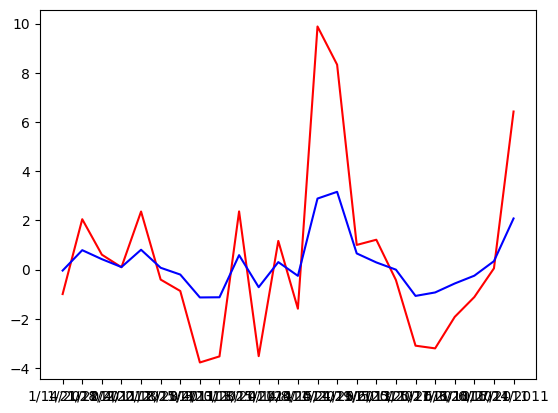

In [ ]:
plt.plot(intel["date"], y, c = "r")
plt.plot(intel["date"], y_pred, c = "blue")


# Влад_работает

In [47]:
# Это делал Максим, вынес сюда для удобства запуска

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
df = pd.read_csv("/content/dow_jones_index_data.csv")
new_df = df.dropna()
new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
new_df['low'] = new_df['low'].str.replace('$', '', regex=True).astype(float)
new_df['close'] = new_df['close'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_open'] = new_df['next_weeks_open'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_close'] = new_df['next_weeks_close'].str.replace('$', '', regex=True).astype(float)

data_df = new_df[["open", "high", "low", "close", "volume",
                  "percent_change_price", "percent_change_volume_over_last_wk",
                  "previous_weeks_volume", "next_weeks_open", "next_weeks_close",
                  "days_to_next_dividend", "percent_return_next_dividend",
                  "percent_change_next_weeks_price"]]
new_df['date'] = pd.to_datetime(new_df['date'])

<ipython-input-47-56b9644908d6>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-56b9644908d6>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-56b9644908d6>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-56b9

Скажем спасибо Максиму за очистку данных (предобработка) и свой анализ данных (линейная модель и библиотечная отдельная функция)

**Такс, поехали**

Начнем с ЕДЫ (на ЭАДе так принято)


Разведочный анализ (EDA)

In [ ]:
new_df.head(10) # просто чекнули таблицу

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,16.98,16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,16.81,16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,16.58,16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,109493077.0,15.95,16.11,1.003130,62,0.187149
10,1,AA,3/18/2011,15.95,16.33,15.43,16.11,130374108,1.003130,14.030601,114332562.0,16.38,17.09,4.334550,55,0.186220


In [ ]:
new_df.describe().T # удобная функция, считающая основные метрики


,count,mean,std,min,25%,50%,75%,max
quarter,720.0,1.541667e+00,4.986072e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
open,720.0,5.374838e+01,3.276425e+01,1.059000e+01,2.996500e+01,4.601500e+01,7.280500e+01,1.721100e+02
high,720.0,5.476481e+01,3.335748e+01,1.094000e+01,3.066250e+01,4.691000e+01,7.434000e+01,1.735400e+02
low,720.0,5.272788e+01,3.223807e+01,1.040000e+01,2.871250e+01,4.495000e+01,7.110500e+01,1.678200e+02
close,720.0,5.382549e+01,3.292476e+01,1.052000e+01,3.041500e+01,4.612500e+01,7.276500e+01,1.705800e+02
volume,720.0,1.156040e+08,1.520844e+08,9.718851e+06,3.069225e+07,5.274535e+07,1.311530e+08,1.054415e+09
percent_change_price,720.0,3.014043e-02,2.504889e+00,-1.542290e+01,-1.297355e+00,0.000000e+00,1.630870e+00,9.882230e+00
percent_change_volume_over_last_wk,720.0,5.593627e+00,4.054348e+01,-6.143318e+01,-1.980428e+01,5.125859e-01,2.180062e+01,3.274089e+02
previous_weeks_volume,720.0,1.173876e+08,1.592322e+08,9.718851e+06,3.067832e+07,5.294556e+07,1.333230e+08,1.453439e+09
next_weeks_open,720.0,5.380850e+01,3.291975e+01,1.052000e+01,3.038500e+01,4.604000e+01,7.280500e+01,1.721100e+02


In [ ]:
new_df.columns # для себя, так как мы уже смотрели из чего состоит датасет

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [ ]:
new_df.nunique()

quarter                                 2
stock                                  30
date                                   24
open                                  694
high                                  684
low                                   685
close                                 687
volume                                720
percent_change_price                  715
percent_change_volume_over_last_wk    720
previous_weeks_volume                 720
next_weeks_open                       692
next_weeks_close                      690
percent_change_next_weeks_price       715
days_to_next_dividend                 103
percent_return_next_dividend          704
dtype: int64

Начнем наши гениальные мувы, но сначала Трэвис Скотт (простите, но мне начал нравится американский рэп)

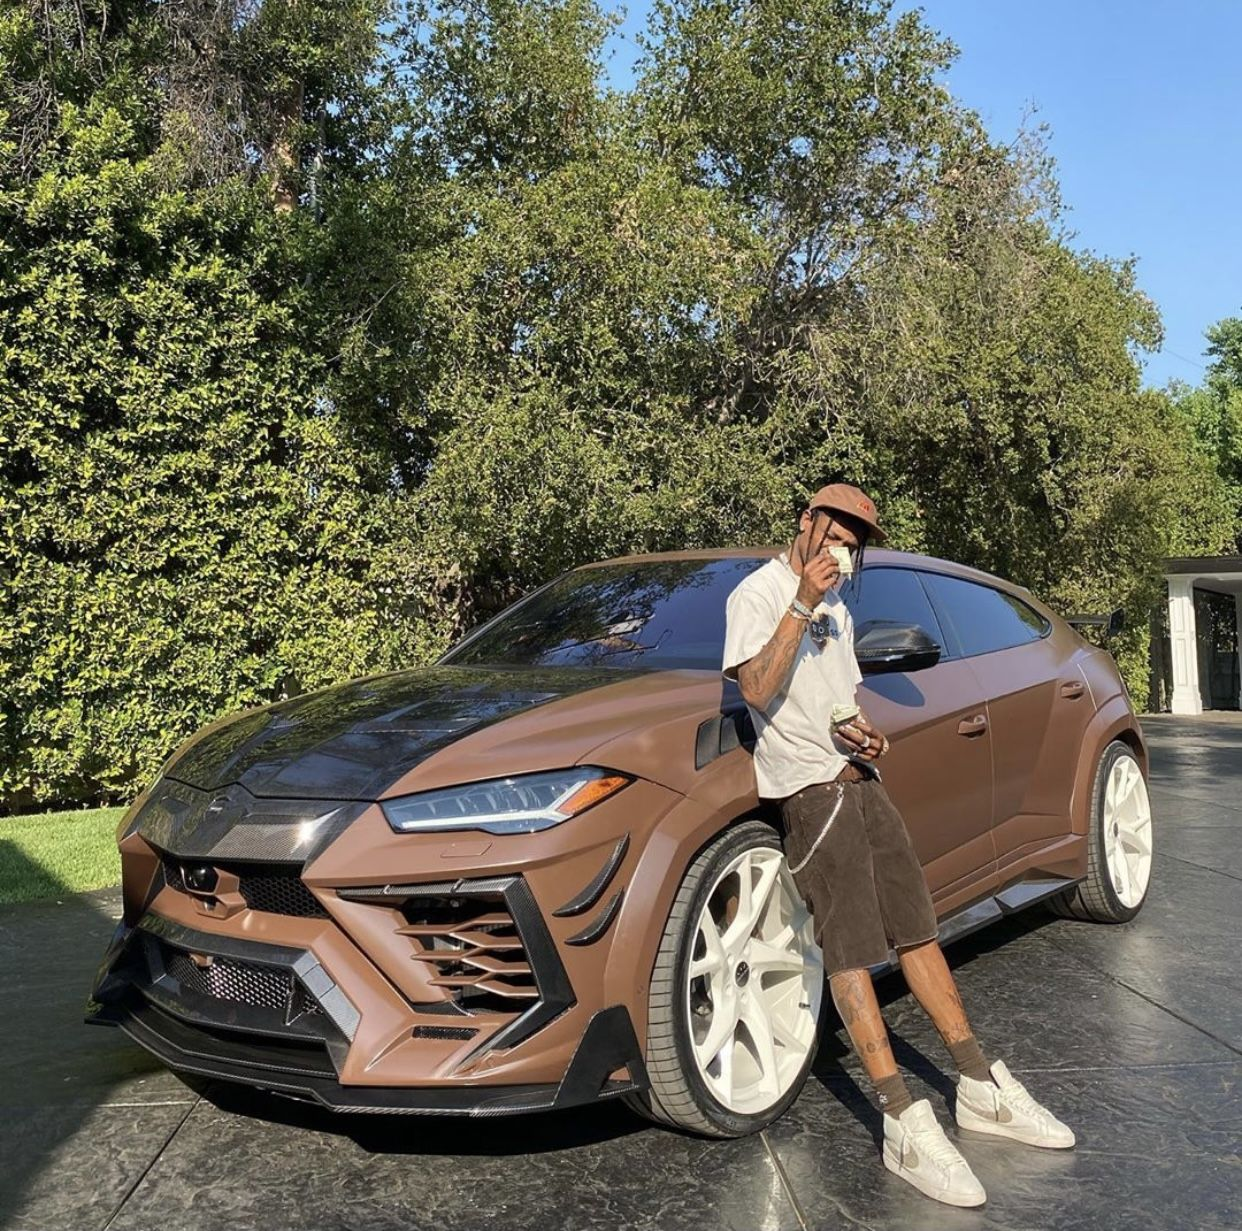


Настоло время серьезной артиллерии.
Знание plotly мне пригодилось (про это была последняя домашка по продвинотому питону)

In [28]:
df_q1 = new_df[new_df['quarter'] == 1]
df_q2 = new_df[new_df['quarter'] == 2]

colors = px.colors.qualitative.Plotly

def create_stock_traces(df, title):
    fig = go.Figure()
    stocks = df['stock'].unique()
    for i, stock in enumerate(stocks):
        df_stock = df[df['stock'] == stock]
        fig.add_trace(
            go.Scatter(
                x=df_stock['date'],
                y=df_stock['close'],
                name=stock,
                mode="markers+lines",
                marker=dict(color=colors[i % 10], size=4),
                line=dict(color=colors[i % 10], width=1.5) # Почему там только 10 цветов, кринж,
                # тогда они будут повторяться, сделаем так, чтобы цвета по кругу шли
            )
        )
    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(title=title)
    return fig

fig_q1 = create_stock_traces(df_q1, 'Цены акций в первом квартале')
fig_q2 = create_stock_traces(df_q2, 'Цены акций во втором квартале')


fig_q1.show()
fig_q2.show()


КРЧ, вот [здесь](https://medium.com/quantdart/%D1%82%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B8%D0%B7%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%81%D0%B2%D0%B5%D1%87-%D1%87%D0%B0%D1%81%D1%82%D1%8C-1-2883a9ce9fa3) нашел интересную опцию по анализу котировок акций. Попробуем сделать самую известную штуку - Свечи. Для самых дорогой акции - IBM, самой дешевой - BAC, самый выросшей акции (конец-начало) и самой упавшей (найдем их также).

Единственное, я думал будет чуть проще считать так как у нас есть посчитанные проценты изменения по неделям, но оказалось, что так не сработает, т.к. цена всегда меняется, а проценты изменения считаются от этих цен - и просто суммирование процентов не работает

In [42]:
cheap_stock_df='BAC'
expensive_stock_df='IBM'

df_sorted = new_df.sort_values(by=['stock', 'date'])

first_open = df_sorted.groupby('stock')['open'].first().reset_index()
last_close = df_sorted.groupby('stock')['close'].last().reset_index()

merged_data = pd.merge(first_open, last_close, on='stock')
merged_data['percent_change'] = (merged_data['close'] - merged_data['open']) / merged_data['open'] * 100

most_increasing_stock_df = merged_data.loc[merged_data['percent_change'].idxmax()][0]
most_decreasing_stock_df = merged_data.loc[merged_data['percent_change'].idxmin()][0]
print(most_increasing_stock_df)
print('-'*5)
print(most_decreasing_stock_df)

IBM
-----
CSCO


Ну и заодно посмотрим на все акции,сортируя их

In [52]:
merged_data=merged_data.sort_values(by="percent_change", ascending=False).reset_index(drop=True)
merged_data

,stock,open,close,percent_change
0,IBM,147.00,165.07,12.292517
1,KRFT,30.91,34.60,11.937884
2,MCD,74.25,81.84,10.222222
3,PFE,18.22,20.08,10.208562
4,AXP,44.20,48.34,9.366516
5,UTX,78.27,84.33,7.742430
6,CVX,90.95,97.90,7.641561
7,DD,48.30,51.96,7.577640
8,CAT,93.21,100.01,7.295355
9,TRV,53.12,56.68,6.701807


In [60]:

fig = px.bar(merged_data, x=merged_data.stock, y=merged_data.percent_change, color=merged_data.percent_change,
               title='Рост / падение акций в процентах')

fig.show()

In [63]:
fig = go.Figure()
fig.add_trace(
            go.Scatter(
                x=merged_data['stock'],
                y=merged_data['percent_change'],
                name='Рост / падение акций в процентах'
            ))
fig.show()

Опа, ну давайте выкинем ibm, так это одновременная и самая выросщая акция (несмотря на свою дороговизну) и самая дорогая

In [18]:
def create_candlestick_chart(stock, df):
    stock_data = df[df['stock'] == stock]
    fig = go.Figure(data=[go.Candlestick(x=stock_data['date'],
                    open=stock_data['open'], high=stock_data['high'],
                    low=stock_data['low'], close=stock_data['close'])])
    fig.update_layout(title=f'Свеча для {stock}', xaxis_title='Дата', yaxis_title='Цена')
    fig.show()

# Создаем свечные графики для каждой из акций
create_candlestick_chart(cheap_stock_df, new_df)
create_candlestick_chart(most_increasing_stock_df, new_df)
create_candlestick_chart(most_decreasing_stock_df, new_df)

Гуглим, про CSCO (15 в конце) и BAC (10 в конце), так как если построить их графики линейно - они должны были бы обанкротиться.

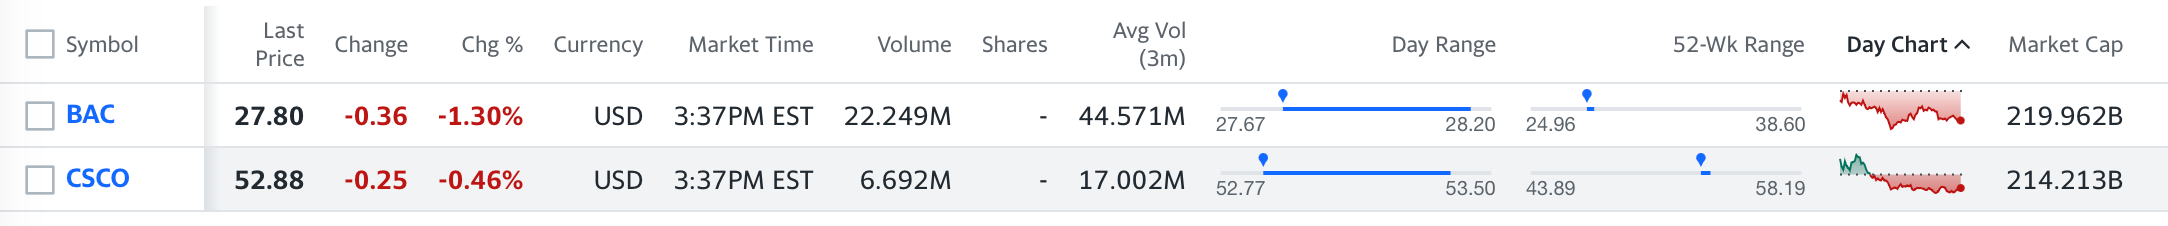

Гуглим инфляцию

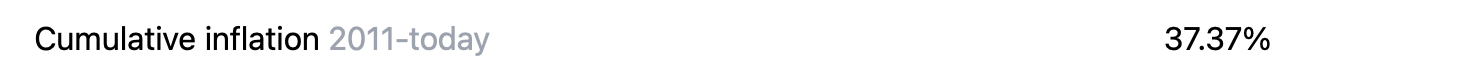

Эх, мы были бы богаты, если бы вложились тогда в +- худшие акции даже этого датасета. Ладно, пошутили и хватит, продолжаем анализ.


Потом используем в анализе данных

In [66]:
avg_percent_change_by_days = new_df.groupby('days_to_next_dividend')['percent_change_price'].mean().reset_index()

# Визуализируем результаты
fig = px.scatter(avg_percent_change_by_days,
                 x='days_to_next_dividend',
                 y='percent_change_price',
                 title='Изменение цены по дням до начисления дивидентов')
fig.show()

# Влад_анализ_данных

Так, ну попробуем немного поюзать scikit-learn и какую-нибудь новомодную хипстерскую модельку ради веселья

Давайте сделаем вот что - поделим данные на две штуки - по кварталам, одни будут

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Для Максима: я почистил код и убрал нерабочее пока, чтобы не путаться. оставил только то, что работает (хотя здесь и нет непосредственного анализа данных, потому что я криворукий)

In [91]:
X = avg_percent_change_by_days[['days_to_next_dividend']]
y = avg_percent_change_by_days['percent_change_price']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
fig=go.Figure()
fig.add_trace(go.Scatter(x=X.squeeze(), y=predictions, name='Регрессия'))
fig.add_trace(go.Scatter(
                 x=avg_percent_change_by_days.days_to_next_dividend,
                 y=avg_percent_change_by_days.percent_change_price, name='Точки', mode='markers'))
fig.show()

MAE: 1.194355357838965
MSE: 2.8597524028603463
RMSE: 1.6910802473154094


Ну я не знаю какой вывод можно тут сделать - акции будут скорее расти, если до дивидентов очень долго (это можно объяснить тем, что когда выплачиваются дивиденты - фактически у вас прибыль перераспределеятся среди инвесторов и по всей логике цена на акции должна падать примерно на выплаченные дивиденты)